# 1. Introdução aos Métodos Descritivos

## Definição de Métodos Descritivos
Métodos Descritivos em Machine Learning são técnicas usadas para explorar, analisar e descrever a estrutura dos dados.
Diferentemente dos métodos preditivos, que focam em prever variáveis alvo (classe alvo - aprendizado supervisionado), os métodos descritivos buscam identificar padrões, relações ou características intrínsecas nos dados, sem a necessidade de uma variável de resposta pré-definida (sem classe alvo, algoritmo não-supervisionado).

## Importância e Aplicações do Agrupamento
- **Agrupamento (Clustering):**
  - *Conceito:* O agrupamento visa agrupar dados com características similares.
  - *Importância:* Ajuda a descobrir a estrutura subjacente nos dados, útil em análise exploratória.
  - *Aplicações:* Segmentação de mercado, organização de grandes bibliotecas de documentos, análise de redes sociais, e em sistemas de recomendação para encontrar grupos de itens semelhantes.

## Importância e Aplicações das Regras de Associação
- **Regras de Associação:**
  - *Conceito:* Estas regras são usadas para identificar relações frequentes e fortes entre variáveis em grandes conjuntos de dados.
  - *Importância:* Cruciais para a análise de transações, ajudando a entender padrões de compra do consumidor.
  - *Aplicações:* Análise de cesto de compras, detecção de fraudes, análise de redes sociais e bioinformática.

In [1]:
# Importando as bibliotecas essenciais para análise de dados e machine learning
import pandas as pd         # Para manipulação e análise de dados
import numpy as np          # Para operações numéricas e matriciais
import matplotlib.pyplot as plt  # Para visualização de dados
import seaborn as sns       # Para visualização de dados avançada

# Bibliotecas específicas para métodos de Machine Learning
from sklearn.cluster import KMeans  # Para o algoritmo de agrupamento K-Means
from sklearn.decomposition import PCA  # Para análise de componentes principais (PCA)
from sklearn.preprocessing import StandardScaler  # Para normalização de dados

# Configurações adicionais para visualizações
%matplotlib inline
sns.set_style("whitegrid")

# 2. Agrupamento (Clustering)

## Introdução ao Conceito de Agrupamento
O Agrupamento, ou Clustering, é um método de aprendizado não supervisionado que envolve a divisão de um conjunto de dados em subconjuntos, de modo que os dados em cada subconjunto (idealmente) compartilham algumas características comuns ou propriedades. O objetivo é descobrir uma estrutura ou padrão inerente nos dados, agrupando-os com base na semelhança de suas características.

## Tipos de Técnicas de Agrupamento e Suas Aplicações
- **K-Means:**
  - *Descrição:* Divide os dados em K grupos distintos baseados na distância aos centróides.
  - *Aplicações:* Segmentação de mercado, agrupamento de documentos, análise de imagens e dados geoespaciais.

- **Agrupamento Hierárquico:**
  - *Descrição:* Constrói uma hierarquia de clusters, seja de forma aglomerativa (bottom-up) ou divisiva (top-down).
  - *Aplicações:* Análise taxonômica, organização de bibliotecas de mídia, categorização de produtos.

- **DBSCAN (Density-Based Spatial Clustering of Applications with Noise):**
  - *Descrição:* Agrupa pontos que estão próximos uns dos outros com base na densidade.
  - *Aplicações:* Detecção de anomalias, análise de dados espaciais, identificação de aglomerados em dados de alta dimensionalidade.

- **Agrupamento Baseado em Modelo:**
  - *Descrição:* Utiliza modelos probabilísticos para determinar a pertinência dos dados a um cluster.
  - *Aplicações:* Bioinformática (por exemplo, agrupamento de genes), marketing (segmentação de clientes), análise de redes sociais.

In [2]:
#!pip install ipywidgets

In [3]:
from sklearn.datasets import make_blobs
import ipywidgets as widgets
from IPython.display import display

class KMeansVisualizer:
    def __init__(self, X, n_clusters, n_iterations, output_widget):
        self.X = X
        self.n_clusters = n_clusters
        self.n_iterations = n_iterations
        self.kmeans = KMeans(n_clusters=n_clusters, init='random', n_init=1, random_state=0)
        self.current_iteration = 0
        self.output_widget = output_widget
        self.states = []

        for i in range(n_iterations):
            self.kmeans.max_iter = i + 1
            y_kmeans = self.kmeans.fit_predict(X)
            centers = self.kmeans.cluster_centers_
            self.states.append((y_kmeans.copy(), centers.copy()))

    def plot_current_state(self):
        with self.output_widget:
            self.output_widget.clear_output(wait=True)
            y_kmeans, centers = self.states[self.current_iteration]
            plt.scatter(self.X[:, 0], self.X[:, 1], c=y_kmeans, s=50, cmap='viridis')
            plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='x')
            plt.title(f'K-Means Iteration {self.current_iteration + 1}')
            plt.show()

    def on_previous_clicked(self, b):
        if self.current_iteration > 0:
            self.current_iteration -= 1
            self.plot_current_state()

    def on_next_clicked(self, b):
        if self.current_iteration < self.n_iterations - 1:
            self.current_iteration += 1
            self.plot_current_state()


# Atualização dos Centróides no K-Means

O K-Means é um algoritmo de agrupamento que busca particionar um conjunto de dados em K grupos distintos. Uma das etapas cruciais desse algoritmo é a atualização dos centróides dos clusters. Vamos entender como isso é feito:

## 1. Inicialização dos Centróides
- No início, K centróides são inicializados. Isso pode ser feito de várias maneiras, como escolher aleatoriamente K pontos dos dados ou pontos aleatórios no espaço de características.
- Esses centróides iniciais servem como ponto de partida para a formação dos clusters.

## 2. Atribuição de Pontos aos Clusters
- Cada ponto de dado é atribuído ao cluster do centróide mais próximo.
- A proximidade é geralmente medida usando a distância euclidiana entre o ponto de dado e o centróide.

## 3. Recálculo dos Centróides
- Após a atribuição de todos os pontos a clusters, os centróides são recalculados.
- O novo centróide de um cluster é calculado tomando a média de todas as coordenadas dos pontos de dados no cluster.
- Matematicamente, se um cluster tem pontos \(x_1, x_2, ..., x_n\), o novo centróide \(c\) é calculado como:
  \[ c = \frac{1}{n} \sum_{i=1}^{n} x_i \]
- Isso significa que cada coordenada do centróide é a média das coordenadas correspondentes de todos os pontos no cluster.

## 4. Repetição do Processo
- O processo de atribuição de pontos e recalculação dos centróides é repetido.
- A cada iteração, os centróides se movem, idealmente, para a posição que minimiza a variação dentro de cada cluster.

## 5. Convergência
- O algoritmo continua iterando até que os centróides não mudem significativamente entre as iterações consecutivas, indicando a convergência.
- Outro critério de parada comum é o número máximo de iterações, que previne o algoritmo de correr indefinidamente.

## Resultado Final
- Ao final, os centróides representam o 'centro' de seus clusters, e os pontos de dados são agrupados de forma que a distância total entre eles e os centróides de seus respectivos clusters seja minimizada.

Este processo iterativo permite que o K-Means encontre uma boa partição dos dados, agrupando-os efetivamente em clusters com características semelhantes.

In [4]:
# Gerando dados sintéticos
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=16)

output_widget = widgets.Output()
visualizer = KMeansVisualizer(X, n_clusters=4, n_iterations=5, output_widget=output_widget)

# Criando botões de navegação
previous_button = widgets.Button(description='Previous')
next_button = widgets.Button(description='Next')
previous_button.on_click(visualizer.on_previous_clicked)
next_button.on_click(visualizer.on_next_clicked)

# Exibir os widgets e o gráfico inicial
buttons = widgets.HBox([previous_button, next_button])
display(buttons, output_widget)
visualizer.plot_current_state()

Output()

# 3. Algoritmos de Agrupamento

## Algoritmo Hierárquico
### Descrição
- O Agrupamento Hierárquico é um método de análise de cluster que busca construir uma hierarquia de clusters.
- Existem dois tipos: Aglomerativo (bottom-up) e Divisivo (top-down).

### Vantagens
- Não requer a especificação do número de clusters.
- O dendrograma produzido é útil para entender os dados.

### Desvantagens
- Computacionalmente caro, especialmente para grandes conjuntos de dados.
- Uma vez que uma decisão é feita para combinar dois clusters, não pode ser desfeita.

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
### Descrição
- DBSCAN agrupa pontos que estão próximos um do outro com base em densidade.
- Pontos em regiões de alta densidade são agrupados juntos, e pontos em regiões de baixa densidade são considerados ruído.

### Vantagens
- Não requer que se especifique o número de clusters.
- Pode encontrar clusters de formas arbitrárias.

### Desvantagens
- Não se sai bem quando os clusters variam significativamente em densidade.
- A escolha dos parâmetros (eps e min_samples) pode ser difícil.

## Outros Algoritmos de Agrupamento
- **Mean Shift:** Baseia-se em deslizar janelas para a densidade mais alta de pontos.
- **Expectation-Maximization (EM) usando Misturas Gaussianas:** Modelo baseado em misturas de distribuições Gaussianas.
- **Agrupamento Espectral:** Usa autovalores de uma matriz de similaridade para reduzir a dimensionalidade antes de agrupar.


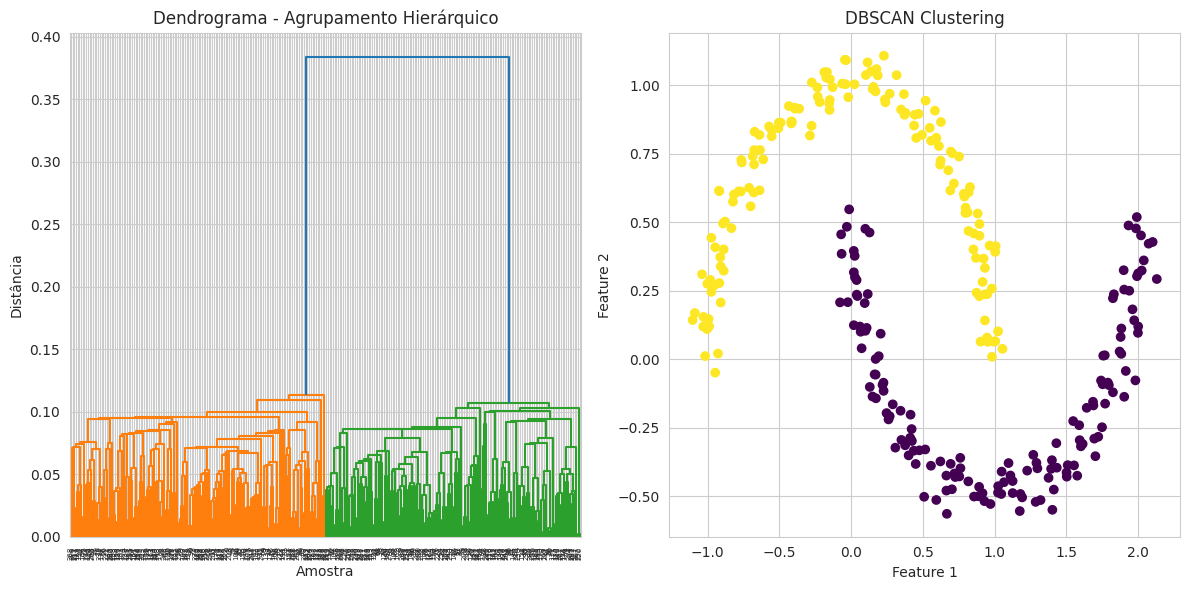

In [5]:
# Exemplos Práticos de Algoritmos de Agrupamento com Visualizações

# Importando as bibliotecas necessárias
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Configurações para visualizações
plt.rcParams['figure.figsize'] = [12, 6]

# Gerando um dataset para Agrupamento Hierárquico e DBSCAN
X_moons, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Aplicando Agrupamento Hierárquico
linked = linkage(X_moons, 'single')
plt.subplot(1, 2, 1)
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma - Agrupamento Hierárquico')
plt.xlabel('Amostra')
plt.ylabel('Distância')

# Aplicando DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X_moons)
plt.subplot(1, 2, 2)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=clusters, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Comentários:
# Este bloco de código demonstra a aplicação prática de dois algoritmos de agrupamento: Hierárquico e DBSCAN.
# O dendrograma ajuda a entender como os clusters hierárquicos são formados.
# DBSCAN é aplicado ao mesmo conjunto de dados, mostrando como ele agrupa dados com base na densidade.


# Explicação dos Modelos de Clusterização e seus Parâmetros

## K-Means
- **Descrição:** O K-Means é um algoritmo de clusterização que particiona o conjunto de dados em K grupos distintos, minimizando a soma das distâncias quadradas de cada ponto ao centróide do seu cluster.
- **Parâmetros Principais:**
  - `n_clusters`: Número de clusters desejados.
  - `random_state`: Semente para a geração de números aleatórios, garantindo a reproducibilidade.

## Agrupamento Hierárquico (AgglomerativeClustering)
- **Descrição:** Este método constrói uma hierarquia de clusters, fundindo iterativamente os pares de clusters que minimizam algum critério de ligação.
- **Parâmetros Principais:**
  - `n_clusters`: Número de clusters a serem formados e a quantidade de centróides a serem gerados.
  - Não possui um `random_state`, pois o algoritmo é determinístico.

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
- **Descrição:** O DBSCAN agrupa pontos que estão densamente agrupados e marca pontos em regiões pouco densas como ruído ou outliers.
- **Parâmetros Principais:**
  - `eps`: A distância máxima entre dois pontos para serem considerados no mesmo bairro.
  - `min_samples`: O número mínimo de pontos para formar um cluster denso.

## Agrupamento Baseado em Modelo (GaussianMixture)
- **Descrição:** Este modelo assume que os dados são gerados a partir de uma mistura de várias distribuições Gaussianas com parâmetros desconhecidos.
- **Parâmetros Principais:**
  - `n_components`: Número de componentes de mistura (Gaussianas) no modelo.
  - `random_state`: Semente para a geração de números aleatórios, assegurando a reproducibilidade.

Cada um desses algoritmos tem suas peculiaridades e são adequados para diferentes tipos de dados e requisitos de clusterização. A escolha do algoritmo e a configuração dos parâmetros dependem fortemente da natureza dos dados e do problema específico em questão.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


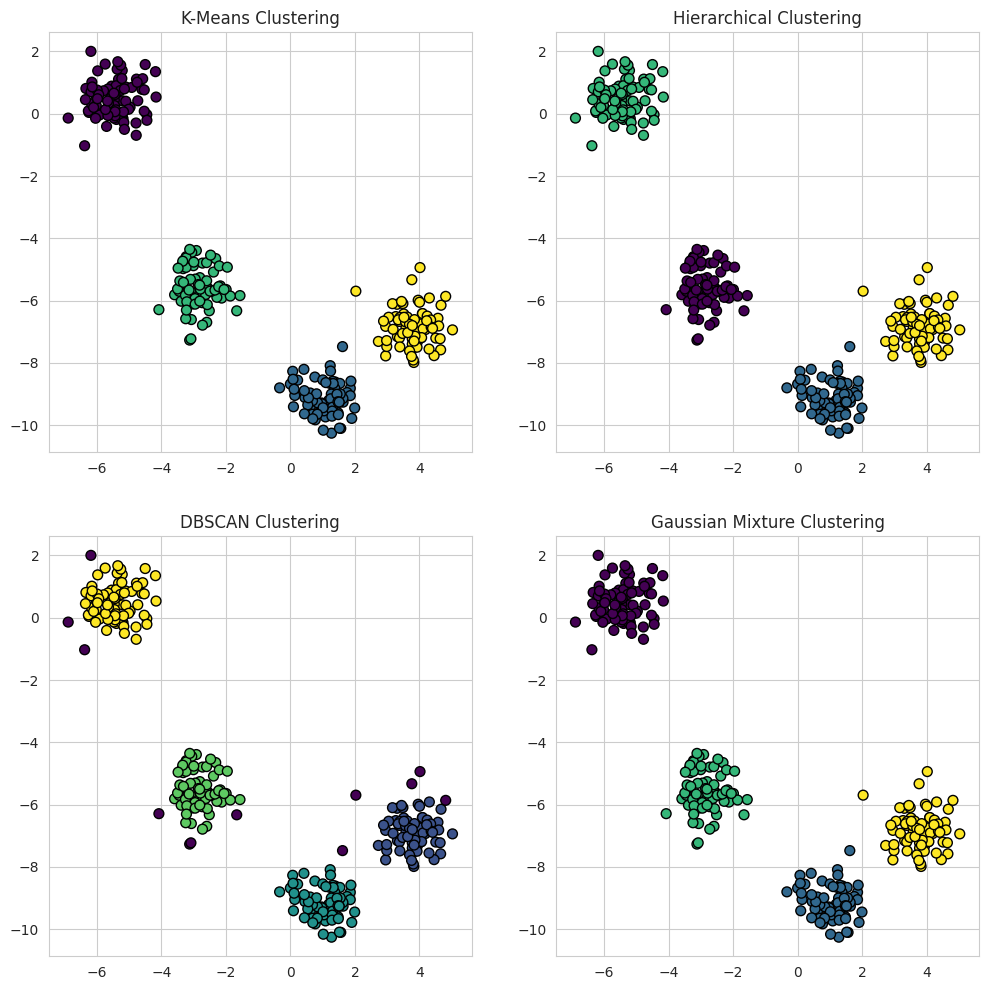

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

# Gerando os dados
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=16)

# Aplicando K-Means
kmeans = KMeans(n_clusters=4, random_state=16)
kmeans_labels = kmeans.fit_predict(X)

# Aplicando Agrupamento Hierárquico
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical_labels = hierarchical.fit_predict(X)

# Aplicando DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Aplicando Agrupamento Baseado em Modelo (Gaussian Mixture)
gmm = GaussianMixture(n_components=4, random_state=16)
gmm_labels = gmm.fit_predict(X)

# Criando gráficos
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# K-Means
axs[0, 0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
axs[0, 0].set_title('K-Means Clustering')

# Agrupamento Hierárquico
axs[0, 1].scatter(X[:, 0], X[:, 1], c=hierarchical_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
axs[0, 1].set_title('Hierarchical Clustering')

# DBSCAN
axs[1, 0].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
axs[1, 0].set_title('DBSCAN Clustering')

# Agrupamento Baseado em Modelo (Gaussian Mixture)
axs[1, 1].scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
axs[1, 1].set_title('Gaussian Mixture Clustering')

plt.show()

# 4. Regras de Associação

## Fundamentos das Regras de Associação
Regras de Associação são uma técnica importante em Data Mining para descobrir relações interessantes entre variáveis em grandes bancos de dados. Elas são usadas para identificar padrões, correlações ou estruturas frequentes entre conjuntos de itens ou atributos em transações ou outros conjuntos de dados.

As regras são frequentemente aplicadas em Análise de Cesto de Compras, onde descobrimos quais produtos tendem a ser comprados juntos. Elas também são úteis em uma variedade de outros campos, como bioinformática, análise de redes sociais e recomendações de produtos.

## Medidas de Associação: Suporte, Confiança e Lift
- **Suporte:**
  - Indica quão frequentemente uma regra de associação é verdadeira em um conjunto de dados.
  - Calculado como a proporção de transações que contêm todos os itens da regra.

- **Confiança:**
  - Mede a confiabilidade da inferência feita pela regra.
  - Calculado como a proporção de transações com o item X que também contêm o item Y.

- **Lift:**
  - Indica a força da associação entre os itens da regra.
  - Calculado como a razão entre a confiança da regra e o suporte do item consequente.
  - Um lift maior que 1 indica uma associação forte.


## Casos de Uso Reais das Regras de Associação

### Análise de Cesto de Compras (Market Basket Analysis)
- **Descrição:** Identifica quais produtos são frequentemente comprados juntos em supermercados ou lojas online.
- **Aplicação:** Usado para otimizar a disposição de produtos nas prateleiras, em promoções cruzadas e para desenvolver estratégias de marketing direcionado.

### Recomendação de Produtos
- **Descrição:** Sugere produtos complementares ou alternativos a clientes com base em suas compras anteriores.
- **Aplicação:** Amplamente utilizado em e-commerce para impulsionar vendas através de recomendações personalizadas.

### Análise de Sequência em Bioinformática
- **Descrição:** Encontra padrões e associações em sequências biológicas, como DNA, RNA ou proteínas.
- **Aplicação:** Auxilia na identificação de relações funcionais entre genes ou na descoberta de novos alvos para drogas.

### Detecção de Fraudes
- **Descrição:** Identifica combinações incomuns de atividades que podem indicar comportamento fraudulento.
- **Aplicação:** Utilizado por instituições financeiras para prevenir fraudes em cartões de crédito ou transações bancárias.

### Análise de Redes Sociais
- **Descrição:** Descobre padrões de relacionamento e interação entre usuários ou grupos.
- **Aplicação:** Usado para entender a dinâmica de redes sociais, identificar influenciadores e otimizar campanhas de marketing.


In [7]:
df = pd.read_csv('Groceries_dataset.csv')

In [8]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [9]:
df.itemDescription.nunique()

167

In [10]:
df.loc[df['Member_number'] == 1000].sort_values(by='Date')

,Member_number,Date,itemDescription
4843,1000,15-03-2015,sausage
8395,1000,15-03-2015,whole milk
20992,1000,15-03-2015,semi-finished bread
24544,1000,15-03-2015,yogurt
13331,1000,24-06-2014,whole milk
29480,1000,24-06-2014,pastry
32851,1000,24-06-2014,salty snack
2047,1000,24-07-2015,canned beer
18196,1000,24-07-2015,misc. beverages
6388,1000,25-11-2015,sausage


In [11]:
# Agrupando os itens por Member_number e Date para criar carrinhos de compras
grouped = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index(name='Items')
grouped

,Member_number,Date,Items
0,1000,15-03-2015,"[sausage, whole milk, semi-finished bread, yog..."
1,1000,24-06-2014,"[whole milk, pastry, salty snack]"
2,1000,24-07-2015,"[canned beer, misc. beverages]"
3,1000,25-11-2015,"[sausage, hygiene articles]"
4,1000,27-05-2015,"[soda, pickled vegetables]"
...,...,...,...
14958,4999,24-01-2015,"[tropical fruit, berries, other vegetables, yo..."
14959,4999,26-12-2015,"[bottled water, herbs]"
14960,5000,09-03-2014,"[fruit/vegetable juice, onions]"
14961,5000,10-02-2015,"[soda, root vegetables, semi-finished bread]"


In [12]:
# Lista de todos os carrinhos de compras
transactions = grouped['Items'].tolist()
transactions

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk'

In [13]:
#!pip install mlxtend

In [14]:
from mlxtend.preprocessing import TransactionEncoder

# Preparando os dados para o modelo Apriori
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_transformed = pd.DataFrame(te_ary, columns=te.columns_)

In [15]:
df_transformed

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Explicação dos Parâmetros do Código Apriori e Association Rules

## Parâmetros do Apriori
O método `apriori` é utilizado para encontrar conjuntos de itens frequentes.

- **df_transformed:**
  - O DataFrame transformado que representa as transações. Cada coluna representa um item, e cada linha representa uma transação. Os valores são `True` se o item estiver presente na transação.

- **min_support:**
  - O suporte mínimo é um valor entre 0 e 1 que define a frequência mínima (relativa) que um conjunto de itens deve ter para ser considerado frequente.
  - No código, `min_support=0.01` significa que estamos considerando conjuntos de itens que aparecem em pelo menos 1% das transações.

- **use_colnames:**
  - Quando definido como `True`, permite que o DataFrame resultante use os nomes das colunas (nomes dos itens) em vez de índices de coluna.

## Parâmetros do Association Rules
O método `association_rules` é utilizado para extrair regras de associação dos conjuntos de itens frequentes.

- **frequent_itemsets:**
  - O DataFrame gerado pelo método Apriori contendo os conjuntos de itens frequentes.

- **metric:**
  - A métrica a ser usada para identificar regras importantes.
  - No código, `metric="confidence"` significa que estamos interessados na confiança das regras.

- **min_threshold:**
  - O valor mínimo para a métrica especificada.
  - Com `min_threshold=0.1`, estamos filtrando regras que têm uma confiança de pelo menos 10%.

## Colunas do DataFrame de Regras
- **antecedents:**
  - O antecedente da regra. Este é o conjunto de itens que implica o consequente.

- **consequents:**
  - O consequente da regra. Este é o item ou conjunto de itens que são implicados pelo antecedente.

- **support:**
  - A proporção de transações que contêm tanto o antecedente quanto o consequente. É uma medida de quão frequentemente a regra ocorre no conjunto de dados.

- **confidence:**
  - Uma medida de quão frequentemente o consequente é verdadeiro quando o antecedente é verdadeiro. É uma medida da força da implicação.

- **lift:**
  - A razão da confiança da regra sobre a frequência esperada do consequente se antecedente e consequente fossem independentes. Um valor maior que 1 indica uma associação forte.

Esta estrutura de código é comumente usada em análise de cesto de compras para descobrir padrões de compra e associações entre itens.

In [16]:
from mlxtend.frequent_patterns import apriori, association_rules

# Aplicando o algoritmo Apriori para encontrar conjuntos de itens frequentes
frequent_itemsets = apriori(df_transformed, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
0,(other vegetables),(whole milk),0.014837,0.121511,0.769430
1,(rolls/buns),(whole milk),0.013968,0.126974,0.804028
2,(soda),(whole milk),0.011629,0.119752,0.758296
3,(yogurt),(whole milk),0.011161,0.129961,0.822940
